### Student Information
Name:朱冠霖

Student ID:E84114097

GitHub ID:kunglin930111

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.interpolate import make_interp_spline

sns.set_style("darkgrid") 

df_raw = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
required_cols = ['text', 'label', 'subjectivity', 'upvote_ratio']
X = df_raw[required_cols].copy()
X = X[['text', 'label']].dropna()

print("Dataset size:", X.shape)
X.head()





Dataset size: (847, 2)


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


In [2]:
# 1.0=positive, 0.0=neutral, -1.0=negative
label_map = {1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'}
X['category'] = X['label']
X['category_name'] = X['label'].map(label_map)

print("--- Data Transformation ---")
print(f"Processed data length (X): {len(X)}")
print(f"Processed columns: {X.columns.tolist()}")
print("\nFirst 5 records:")
print(X.head()) 

--- Data Transformation ---
Processed data length (X): 847
Processed columns: ['text', 'label', 'category', 'category_name']

First 5 records:
                                                text  label  category  \
0                                   Calls on retards   -1.0      -1.0   
1  Stunt as in like why did they even make a big ...    0.0       0.0   
2                  Seeing lots of red in the ticker.    0.0       0.0   
3  Vision Marine Technologies Inc. is rewriting t...    1.0       1.0   
4                           He didn’t say thank you.   -1.0      -1.0   

  category_name  
0      negative  
1       neutral  
2       neutral  
3      positive  
4      negative  


--- Sentiment Category Distribution (value_counts) ---
category_name
positive    109
neutral     423
negative    315
Name: count, dtype: int64
-----------------------------------


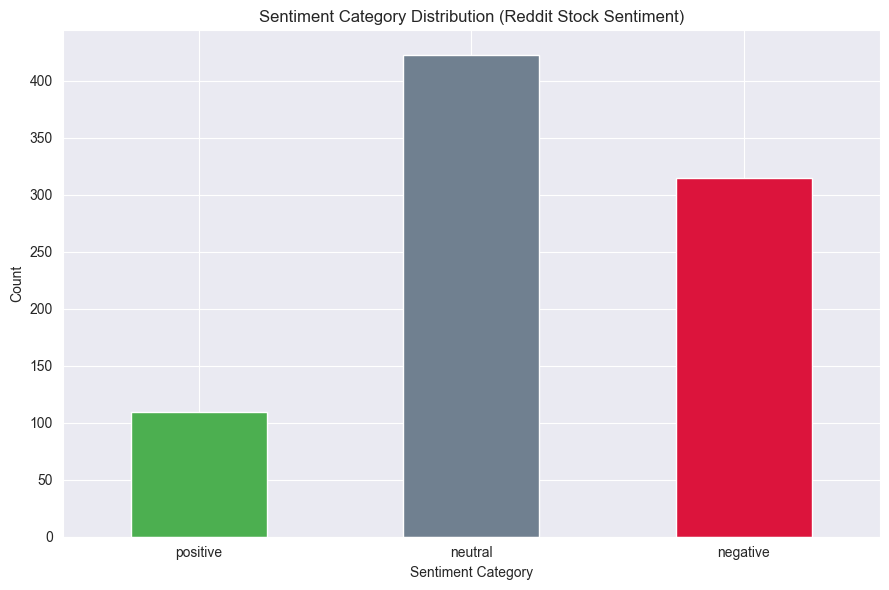


The dataset length 847 is moderate. The full dataset (X_sample = X) will be used for DTM creation.


In [3]:
sns.set_style("darkgrid") 
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus'] = False

category_counts = X.category_name.value_counts().reindex(['positive', 'neutral', 'negative'])
print("--- Sentiment Category Distribution (value_counts) ---")
print(category_counts)
print("-" * 35)

plt.figure(figsize=(9, 6))
g = category_counts.plot(
    kind='bar', 
    title='Sentiment Category Distribution (Reddit Stock Sentiment)',
    rot=0, 
    color=['#4CAF50', '#708090', '#DC143C'] 
)
g.set_xlabel("Sentiment Category")
g.set_ylabel("Count")
plt.tight_layout()
plt.show() 

if len(X) > 10000:
    X_sample = X.sample(n=10000, random_state=42)
    print(f"\nThe dataset length {len(X)} is too large. 10,000 records (X_sample) have been sampled for subsequent testing.")
else:
    X_sample = X.copy()
    print(f"\nThe dataset length {len(X)} is moderate. The full dataset (X_sample = X) will be used for DTM creation.")

In [4]:
count_vect = CountVectorizer(
    stop_words='english',
    min_df=5
)

X_counts = count_vect.fit_transform(X.text)

print("--- DTM Information ---")
print(f"DTM Shape (Documents, Terms): {X_counts.shape}")
print(f"Total Vocabulary (Features): {X_counts.shape[1]}")
print(f"Top 10 Terms (Alphabetical): {count_vect.get_feature_names_out()[:10]}")


--- DTM Information ---
DTM Shape (Documents, Terms): (847, 444)
Total Vocabulary (Features): 444
Top 10 Terms (Alphabetical): ['10' '100' '11' '12' '15' '20' '2025' '25' '30' '4271']


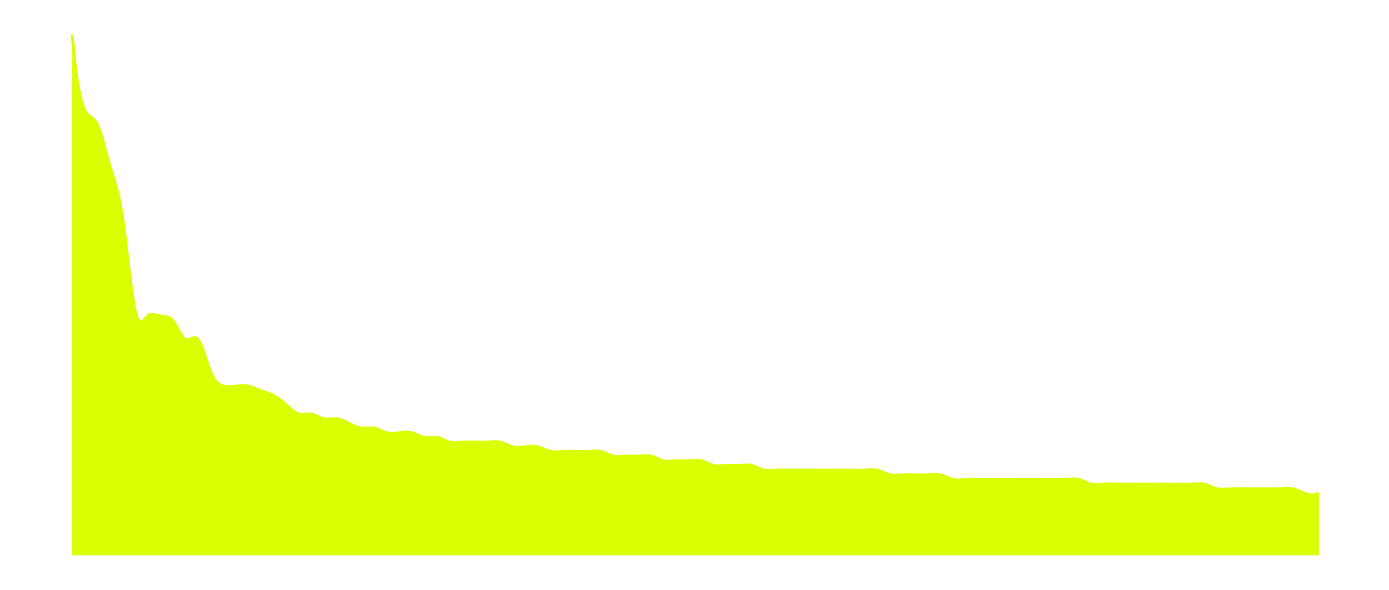


Analysis: The sorted raw frequency graph clearly shows a **long-tail distribution**.
A few words (on the left) have extremely high frequencies,
while the frequencies of the vast majority of words (on the right) decrease rapidly.
This confirms the universality of Zipf's Law in text data.


In [5]:
term_frequencies = X_counts.sum(axis=0).A1
N = 100

top_idx = term_frequencies.argsort()[-N:][::-1]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

x = np.arange(len(top_terms))
y = top_freqs

x_smooth = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

plt.figure(figsize=(14,6))
plt.plot(x_smooth, y_smooth, color="#D9FF00", linewidth=2)
plt.fill_between(x_smooth, y_smooth, color='#D9FF00')

plt.axis('off')

plt.tight_layout()
plt.show()

print("\nAnalysis: The sorted raw frequency graph clearly shows a **long-tail distribution**.\n"
      "A few words (on the left) have extremely high frequencies,\n"
      "while the frequencies of the vast majority of words (on the right) decrease rapidly.\n"
      "This confirms the universality of Zipf's Law in text data.")


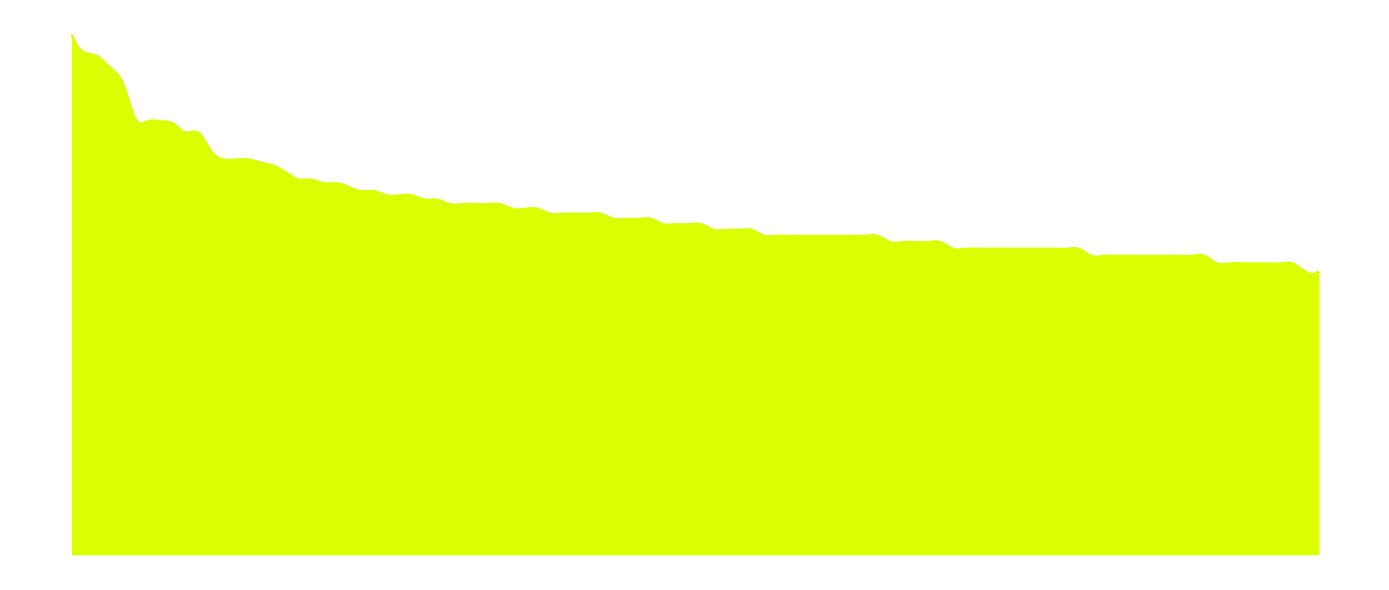


Analysis：After log-transforming the word frequencies,
the previously rapidly declining curve is compressed into a smoother slope.
This effectively reduces the dominance of high-frequency words and makes the distribution differences of low-frequency words easier to visually observe.
Log-transformation is a useful method for evaluating word weights before applying TF-IDF or other frequency-based weighting.


In [6]:
term_frequencies = X_counts.sum(axis=0).A1
N = 100

top_idx = term_frequencies.argsort()[-N:][::-1]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

top_freqs_log = [math.log(f) if f > 0 else 0 for f in top_freqs]

x = np.arange(len(top_terms))
y = top_freqs_log

x_smooth = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_smooth)

plt.figure(figsize=(14,6))
plt.plot(x_smooth, y_smooth, color="#D9FF00", linewidth=2)
plt.fill_between(x_smooth, y_smooth, color='#D9FF00')

plt.axis('off')
plt.tight_layout()
plt.show()

print("\nAnalysis：After log-transforming the word frequencies,\n"
      "the previously rapidly declining curve is compressed into a smoother slope.\n"
      "This effectively reduces the dominance of high-frequency words and makes the distribution differences of low-frequency words easier to visually observe.\n"
      "Log-transformation is a useful method for evaluating word weights before applying TF-IDF or other frequency-based weighting.")

# Phase 2

In [7]:
### Begin Assignment Here